Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Common settings for cosmological parameters and other CLASS parameters

In [3]:
common_settings = {
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T10',
                   'integrate_wrt_m200m' : 1
}


p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


gil_marin = {
    'h':0.7,
    'omega_b': 0.023,
    'omega_cdm': 0.1093,
    'n_s':0.95,
    'sigma8': 0.7913,
    'tau_reio': 0.0543,
}

simone = {}

lazanu = {
    'h':0.71,
    'omega_b': 0.0226,
    'omega_cdm': 0.11,
    'n_s':0.963,
    'A_s': 2.43e-9,
    'k_pivot': 0.002,
}

planck_2015 = {
    'omega_b' : 0.02226,
    'omega_cdm' : 0.1186,
    'A_s':  2.139e-9,
    'k_pivot': 0.05,
    'n_s': 0.9677,
    'h' : 0.6781
}

factor_sz = 1e-2

# testing cellls

In [4]:
M = Class()
#M.set(common_settings)
M.set({
    'output': 'vrms2',
#      'mass function' : 'T10',
#      'integrate_wrt_m200m': 1
})
M.compute()
M.struct_cleanup()
M.empty()

In [5]:
z = 1.
M.get_vrms2_at_z(z)

2.8117204099890883e-06

In [6]:
M.struct_cleanup()
M.empty()

# Obtaining the power spectra

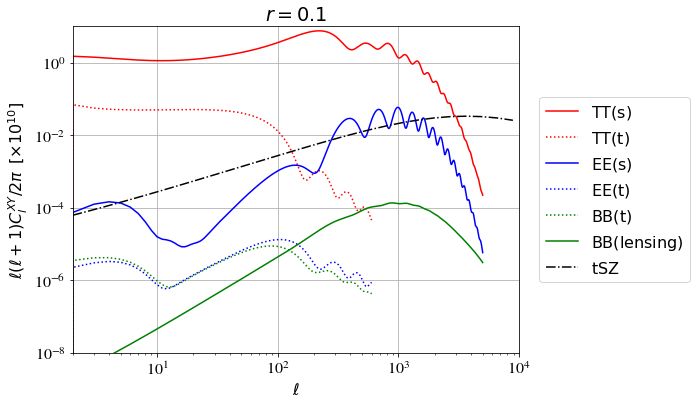

In [4]:


###############
#    
# call CLASS 
#
###############
#
# scalars only
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':5000})
M.compute()
cls = M.raw_cl(5000)
M.struct_cleanup()
M.empty()
#
# tensors only
#
M = Class()
M.set(common_settings)
l_max_tensors = 600
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)
M.struct_cleanup()
M.empty()
#
# scalars + tensors (only in this case we can get the correct lensed ClBB)
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','r':0.1,'n_s':0.9619,'n_t':0,'l_max_scalars':5000,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(5000)
cl_lensed = M.lensed_cl(5000)
M.struct_cleanup()
M.empty()


M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
       'output':'tSZ_1h',
       #'pressure profile': 'A10', 
       'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_sz = M.cl_sz()
M.struct_cleanup()
M.empty()

#
#################
#
# start plotting
#
#################
#
plt.xlim([2,10000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
factort = 1.e10*ellt*(ellt+1.)/2./math.pi

#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),'k-.',label=r'$\mathrm{tSZ}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

# Computing $\kappa$x$\kappa$

In [4]:
common_settings

{'output': 'tCl,pCl,lCl',
 'h': 0.67556,
 'omega_b': 0.022032,
 'omega_cdm': 0.12038,
 'A_s': 2.215e-09,
 'tau_reio': 0.0925,
 'YHe': 0.246,
 'mass function': 'T10',
 'integrate_wrt_m200m': 1}

In [13]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'lens_lens_1h,lens_lens_2h',
        #'mass function' : 'T10',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_kk = M.cl_kk()
M.struct_cleanup()
M.empty()

[]

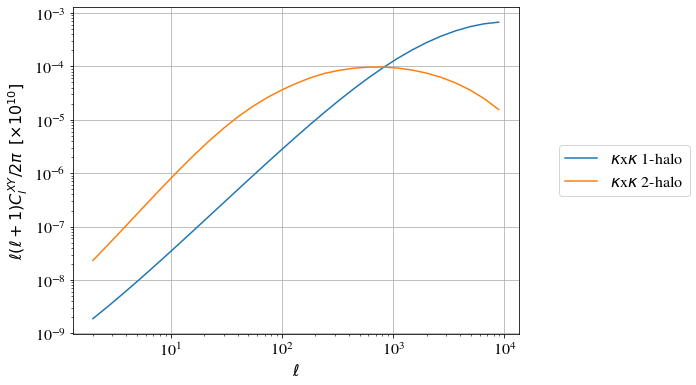

In [14]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_kk['ell'],cl_kk['1h'],label=r'$\kappa$x$\kappa$ 1-halo')
plt.plot(cl_kk['ell'],cl_kk['2h'],label=r'$\kappa$x$\kappa$ 2-halo')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

# Computing gx$\kappa$

In [9]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'gal_lens_1h,gal_lens_2h',
        #'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_kg = M.cl_kg()
M.struct_cleanup()
M.empty()

[]

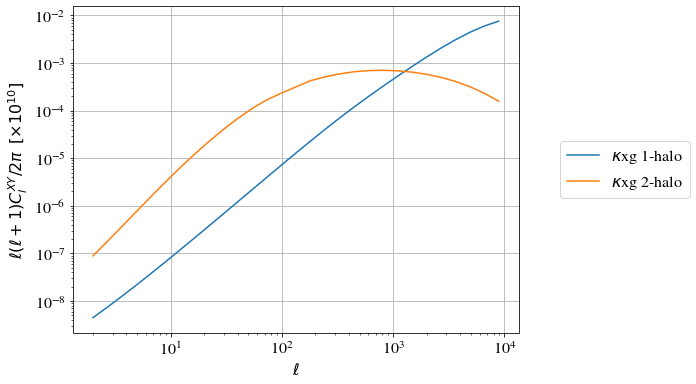

In [10]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_kg['ell'],cl_kg['1h'],label=r'$\kappa$xg 1-halo')
plt.plot(cl_kg['ell'],cl_kg['2h'],label=r'$\kappa$xg 2-halo')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

# Computing gx$\kappa$ for different $x_\mathrm{out}$

[]

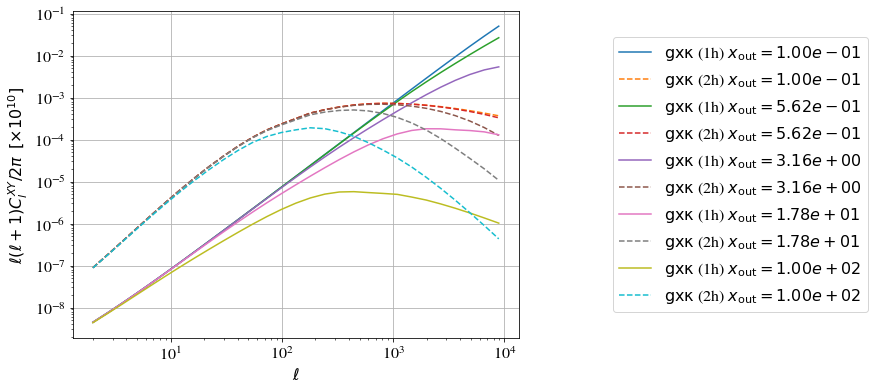

In [11]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()


p_arr  = np.geomspace(1e-1,1e2,5)

for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'gal_lens_1h,gal_lens_2h',
            #'mass function' : 'T10',
            'pressure profile': 'A10', 
            'galaxy_sample': 'unwise',
            'galaxy_sample_id': 'green',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,   
            'x_out_truncated_nfw_profile': p
            })

    M.compute()
    cl = M.cl_kg()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl['ell'],np.asarray(cl['1h']),label=r'$\mathrm{gx\kappa}$ (1h) $x_\mathrm{out} = %.2e$'%p)
    plt.loglog(cl['ell'],np.asarray(cl['2h']),ls='--',label=r'$\mathrm{gx\kappa}$ (2h) $x_\mathrm{out} = %.2e$'%p)


plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
plt.loglog()

# Computing gx$\kappa$ for different $\alpha_\mathrm{s}$

[]

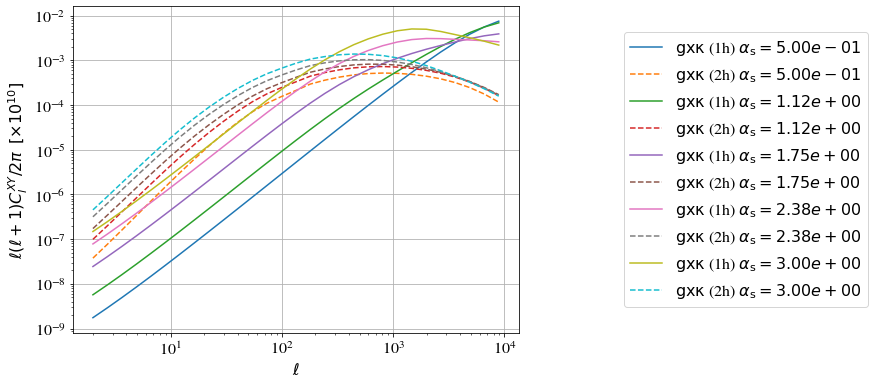

In [12]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()


p_arr  = np.linspace(0.5,3,5)

for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'gal_lens_1h,gal_lens_2h',
            #'mass function' : 'T10',
            'pressure profile': 'A10', 
            'galaxy_sample': 'unwise',
            'galaxy_sample_id': 'green',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,   
            'alpha_s_HOD': p
            })

    M.compute()
    cl = M.cl_kg()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl['ell'],np.asarray(cl['1h']),label=r'$\mathrm{gx\kappa}$ (1h) $\alpha_\mathrm{s} = %.2e$'%p)
    plt.loglog(cl['ell'],np.asarray(cl['2h']),ls='--',label=r'$\mathrm{gx\kappa}$ (2h) $\alpha_\mathrm{s} = %.2e$'%p)


plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
plt.loglog()

# Computing $\kappa$x$\mu$

In [9]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'lens_lensmag_1h,lens_lensmag_2h',
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_km = M.cl_km()
M.struct_cleanup()
M.empty()

[]

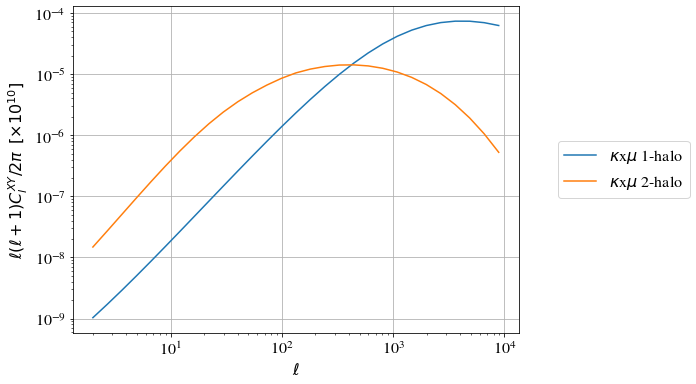

In [10]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_km['ell'],cl_km['1h'],label=r'$\kappa$x$\mu$ 1-halo')
plt.plot(cl_km['ell'],cl_km['2h'],label=r'$\kappa$x$\mu$ 2-halo')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

comparing gxg and gxmu

In [4]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'lens_lensmag_1h,lens_lensmag_2h,gal_lens_1h,gal_lens_2h',
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_km = M.cl_km()
cl_kg = M.cl_kg()
M.struct_cleanup()
M.empty()

In [5]:
smag_green = 0.648
s_mu = 5.*smag_green -2.

(0.0, 1000.0)

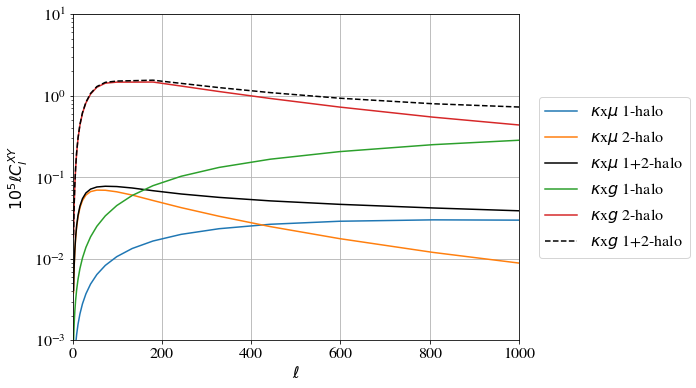

In [6]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$10^5\ell C_l^{XY}$")
plt.grid()
fac = np.asarray(cl_km['ell'])*(np.asarray(cl_km['ell'])+1.)/2./np.pi*1e-5/np.asarray(cl_km['ell'])
plt.plot(cl_km['ell'],s_mu*np.asarray(cl_km['1h'])/fac,label=r'$\kappa$x$\mu$ 1-halo')
plt.plot(cl_km['ell'],s_mu*np.asarray(cl_km['2h'])/fac,label=r'$\kappa$x$\mu$ 2-halo')
plt.plot(cl_km['ell'],s_mu*(np.asarray(cl_km['1h'])+np.asarray(cl_km['2h']))/fac,label=r'$\kappa$x$\mu$ 1+2-halo',c='k')

plt.plot(cl_kg['ell'],cl_kg['1h']/fac,label=r'$\kappa$x$g$ 1-halo')
plt.plot(cl_kg['ell'],cl_kg['2h']/fac,label=r'$\kappa$x$g$ 2-halo')
plt.plot(cl_kg['ell'],(np.asarray(cl_kg['1h'])+np.asarray(cl_kg['2h']))/fac,label=r'$\kappa$x$g$ 1+2-halo',c='k',ls='--')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.xscale('linear')
plt.yscale('log')
plt.ylim(1e-3,1e1)
plt.xlim(0.,1000)

# Halo Occupation Distribution 

In [4]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'gal_gal_1h,gal_gal_2h',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
# M.struct_cleanup()
# M.empty()

In [12]:
M.get_unwise_m_min_cut_at_z(2.,0)

39810717055349.79

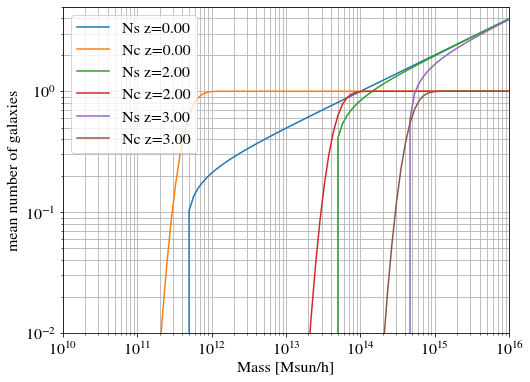

In [17]:
z = [0.,2.,3.]
M_halo = np.geomspace(1e10,1e16,100)
# M_min_sat = 1e13
# M_min_cen = 1e13
alpha_s = 0.3
M1_prime = 1e14
Nc_mean = 1.
sigma_log10M = 0.2
sample_id = 3 # 0 is red 1 is green 2 is green_shallow 3 is blue
for zz in z:
    M_min_sat = M.get_unwise_m_min_cut_at_z(zz,sample_id)
    M_min_cen = M.get_unwise_m_min_cut_at_z(zz,sample_id)
    N_s = np.vectorize(M.get_N_satellites)(zz,M_halo,Nc_mean,M_min_sat,alpha_s,M1_prime)
    N_c = np.vectorize(M.get_N_centrals)(zz,M_halo,M_min_cen,sigma_log10M)
    plt.plot(M_halo,N_s,label="Ns z=%.2f"%zz)
    plt.plot(M_halo,N_c,label="Nc z=%.2f"%zz)
plt.grid(which='both')
plt.loglog()
plt.xlabel('Mass [Msun/h]')
plt.ylabel('mean number of galaxies')
plt.xlim(1e10,1e16)
plt.ylim(1e-2,5)
plt.legend()

Text(0, 0.5, 'mean number density of galaxies [h/Mpc]^3')

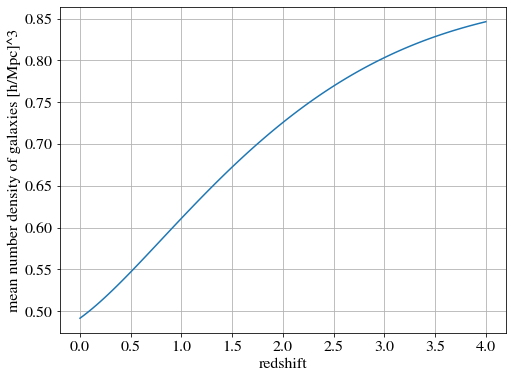

In [13]:
z = np.linspace(0.,4,100)
ng_bar = np.vectorize(M.get_ng_bar_at_z)(z)
plt.plot(z,ng_bar)
plt.grid(which='both')
# plt.semilogy()
plt.xlabel('redshift')
plt.ylabel('mean number density of galaxies [h/Mpc]^3')
# plt.xlim(1e12,1e16)
# plt.ylim(1e-2,5)
# plt.legend()

# Computing gxg

In [4]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'gal_gal_1h,gal_gal_2h',
        'mass function' : 'T10',
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'blue',
        'M_min_HOD_mass_factor_unwise': 0.8,
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_gg = M.cl_gg()
M.struct_cleanup()
M.empty()

[]

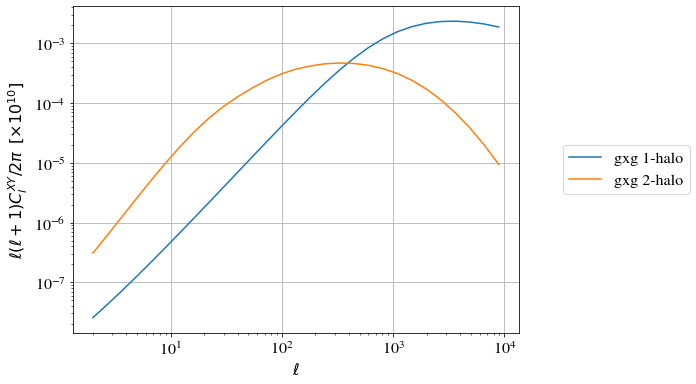

In [5]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_gg['ell'],cl_gg['1h'],label='gxg 1-halo')
plt.plot(cl_gg['ell'],cl_gg['2h'],label='gxg 2-halo')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

varying the truncation radius of the satellite galaxies field

In [11]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'gal_gal_1h,gal_gal_2h',
        'mass function' : 'T10',
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'blue',
        'M_min_HOD_mass_factor_unwise': 0.8,
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
xout_usat = np.linspace(1.e-1,1e1,20)
cl_gg = []
for xx in xout_usat:
    M.set({'x_out_truncated_nfw_profile_satellite_galaxies':xx})
    M.compute()
    cl_gg.append(np.asarray(M.cl_gg()['1h'])+np.asarray(M.cl_gg()['2h']))
ells = np.asarray(M.cl_gg()['ell'])
M.struct_cleanup()
M.empty()

[]

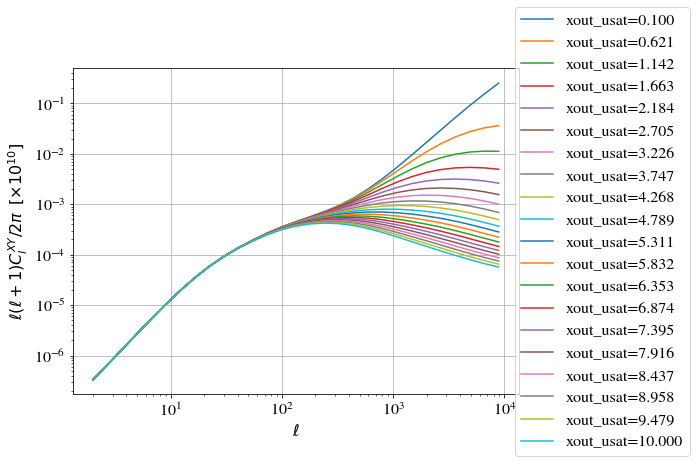

In [12]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
for idx,xx in enumerate(xout_usat):
    plt.plot(ells,cl_gg[idx],label='xout_usat=%.3f'%xx)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

# Computing $\mu$x$\mu$

In [11]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'lensmag_lensmag_1h,lensmag_lensmag_2h',
        #'mass function' : 'T10',
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_mm = M.cl_mm()
M.struct_cleanup()
M.empty()

[]

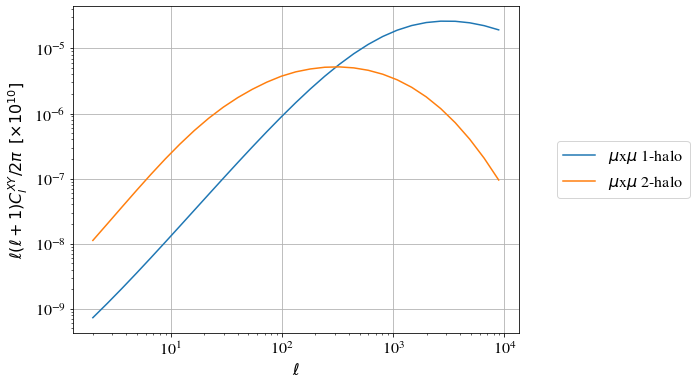

In [12]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_mm['ell'],cl_mm['1h'],label='$\mu$x$\mu$ 1-halo')
plt.plot(cl_mm['ell'],cl_mm['2h'],label='$\mu$x$\mu$ 2-halo')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

# Computing yx$\mu$

(lensing magnification)

In [20]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_lensmag_1h,tSZ_lensmag_2h',
        'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2,
        'M1SZ' : 1e8,
        'm_min_counter_terms' : 1e8
        })
        
M.compute()
cl_ym = M.cl_ym()
M.struct_cleanup()
M.empty()

[]

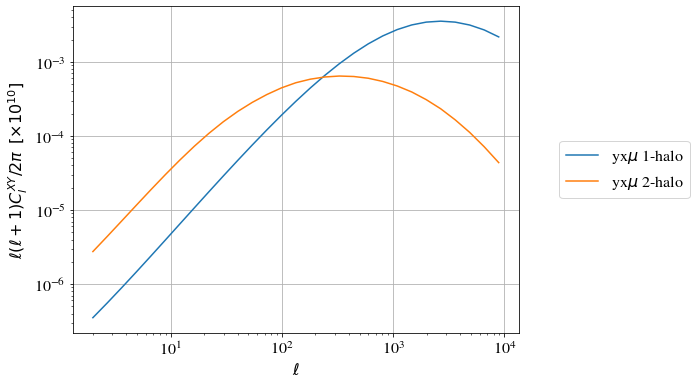

In [21]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_ym['ell'],cl_ym['1h'],label=r'yx$\mu$ 1-halo')
# plt.plot(cl_ym['ell'],cl_ym['2h'],label=r'yx$\mu$ 2-halo')
plt.plot(cl_ym['ell'],np.asarray(cl_ym['2h']),label=r'yx$\mu$ 2-halo')


plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

# Computing yxg

In [22]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_gal_1h,tSZ_gal_2h',
        'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_yg = M.cl_yg()
M.struct_cleanup()
M.empty()

[]

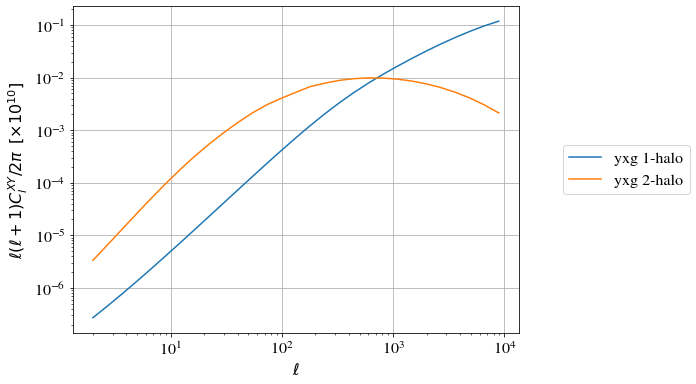

In [23]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
plt.plot(cl_yg['ell'],cl_yg['1h'],label='yxg 1-halo')
plt.plot(cl_yg['ell'],cl_yg['2h'],label='yxg 2-halo')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

# Computing yxy for different gNFW pressure profiles

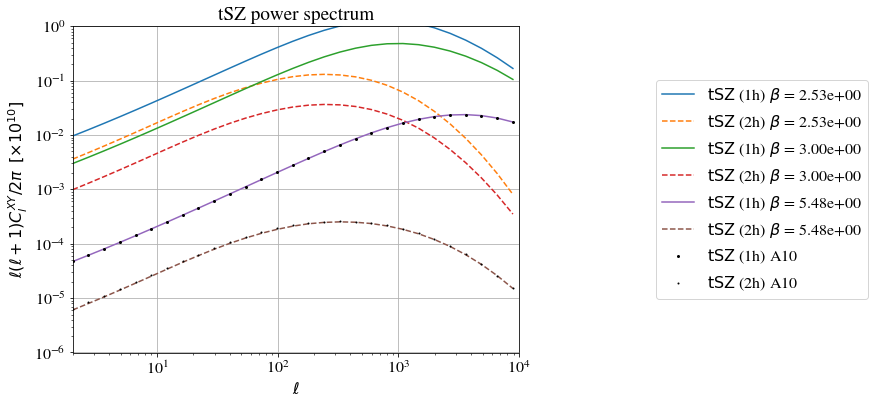

In [24]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_1h,tSZ_2h',
        'mass function' : 'M500',
        'pressure profile': 'A10', 
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_yy_a10 = M.cl_sz()
M.struct_cleanup()
M.empty()


plt.xlim([2,10000])
plt.ylim([1.e-6,1])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"tSZ power spectrum")
plt.grid()

p_arr  = np.linspace(2.53,3., 2)
p_arr = np.append(p_arr,5.4807)
for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
           'output':'tSZ_1h,tSZ_2h',
           'mass function' : 'M500',
           'pressure profile': 'Custom. GNFW', 
           'betaGNFW': p,
           'sz_verbose' : 10,
           'ell_max_mock' : 10000,
           'ell_min_mock' : 2
            })

    M.compute()
    cl_sz = M.cl_sz()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),label=r'$\mathrm{tSZ}$ (1h) $\beta$ = %.2e'%p)
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['2h']),ls='--',label=r'$\mathrm{tSZ}$ (2h) $\beta$ = %.2e'%p)
    
plt.loglog(cl_yy_a10['ell'],factor_sz*np.asarray(cl_yy_a10['1h']),c='k',ls='None',marker='o',markersize=2,label=r'$\mathrm{tSZ}$ (1h) A10')
plt.loglog(cl_yy_a10['ell'],factor_sz*np.asarray(cl_yy_a10['2h']),c='k',ls='None',marker='o',markersize=1,label=r'$\mathrm{tSZ}$ (2h) A10')
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

# Computing yxg for different mass ranges

unwise HOD

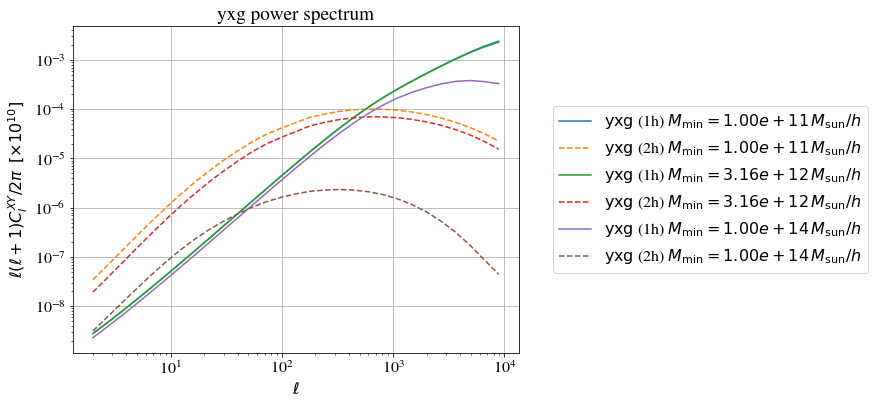

In [25]:

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"yxg power spectrum")
plt.grid()

p_arr  = np.geomspace(1e11,1e14,3)

for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'tSZ_gal_1h,tSZ_gal_2h',
            'mass function' : 'M500',
            'pressure profile': 'A10', 
            'galaxy_sample': 'unwise',
            'galaxy_sample_id': 'green',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,   
            'M1SZ': p
            })

    M.compute()
    cl_sz = M.cl_yg()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),label=r'$\mathrm{yxg}$ (1h) $M_\mathrm{min} = %.2e\,M_\mathrm{sun}/h$'%p)
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['2h']),ls='--',label=r'$\mathrm{yxg}$ (2h) $M_\mathrm{min} = %.2e\,M_\mathrm{sun}/h$'%p)
    
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

Additivity of mass range

In [26]:
m_min = 1e11
m_mid = 5e13
m_max = 1e17




M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_gal_1h,tSZ_gal_2h',
        'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2,   
        'M1SZ': m_min,
        'M2SZ': m_max
    
        })

M.compute()
cl_sz_tot = M.cl_yg()
M.struct_cleanup()
M.empty()

M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_gal_1h,tSZ_gal_2h',
        'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2,   
        'M1SZ': m_min,
        'M2SZ': m_mid
    
        })

M.compute()
cl_sz_low_m = M.cl_yg()
M.struct_cleanup()
M.empty()

M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_gal_1h,tSZ_gal_2h',
        'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2,   
        'M1SZ': m_mid,
        'M2SZ': m_max
    
        })

M.compute()
cl_sz_high_m = M.cl_yg()
M.struct_cleanup()
M.empty()

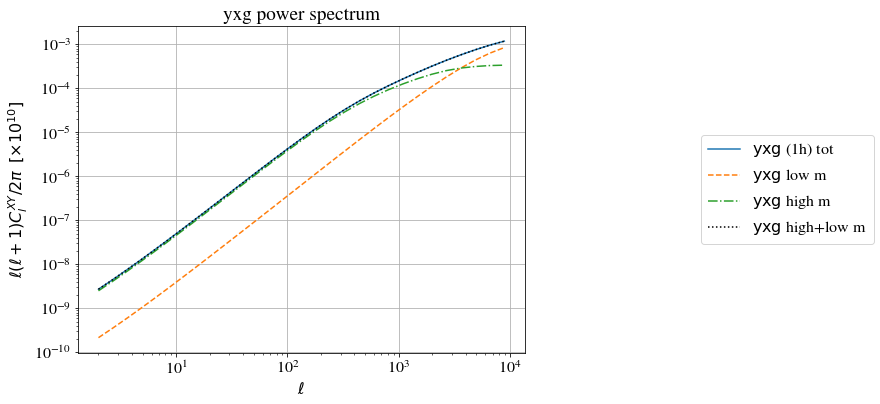

In [27]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"yxg power spectrum")
plt.grid()

plt.loglog(cl_sz_tot['ell'],factor_sz*np.asarray(cl_sz_tot['1h']),label=r'$\mathrm{yxg}$ (1h) tot')
plt.loglog(cl_sz_low_m['ell'],factor_sz*np.asarray(cl_sz_low_m['1h']),ls='--',label=r'$\mathrm{yxg}$ low m')
plt.loglog(cl_sz_high_m['ell'],factor_sz*np.asarray(cl_sz_high_m['1h']),ls='-.',label=r'$\mathrm{yxg}$ high m')
plt.loglog(cl_sz_tot['ell'],factor_sz*np.asarray(cl_sz_high_m['1h'])+factor_sz*np.asarray(cl_sz_low_m['1h']),ls=':',c='k',label=r'$\mathrm{yxg}$ high+low m')


    
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

2-halo term is not additive : 

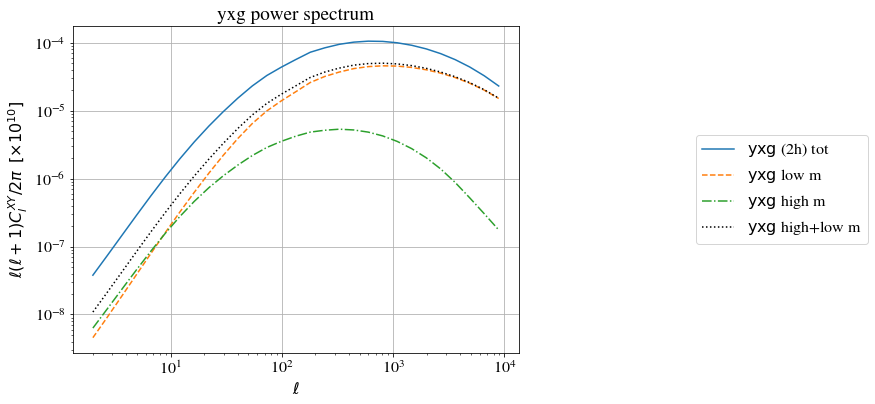

In [28]:
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"yxg power spectrum")
plt.grid()

plt.loglog(cl_sz_tot['ell'],factor_sz*np.asarray(cl_sz_tot['2h']),label=r'$\mathrm{yxg}$ (2h) tot')
plt.loglog(cl_sz_low_m['ell'],factor_sz*np.asarray(cl_sz_low_m['2h']),ls='--',label=r'$\mathrm{yxg}$ low m')
plt.loglog(cl_sz_high_m['ell'],factor_sz*np.asarray(cl_sz_high_m['2h']),ls='-.',label=r'$\mathrm{yxg}$ high m')
plt.loglog(cl_sz_tot['ell'],factor_sz*np.asarray(cl_sz_high_m['2h'])+factor_sz*np.asarray(cl_sz_low_m['2h']),ls=':',c='k',label=r'$\mathrm{yxg}$ high+low m')


    
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

WIxSC HOD

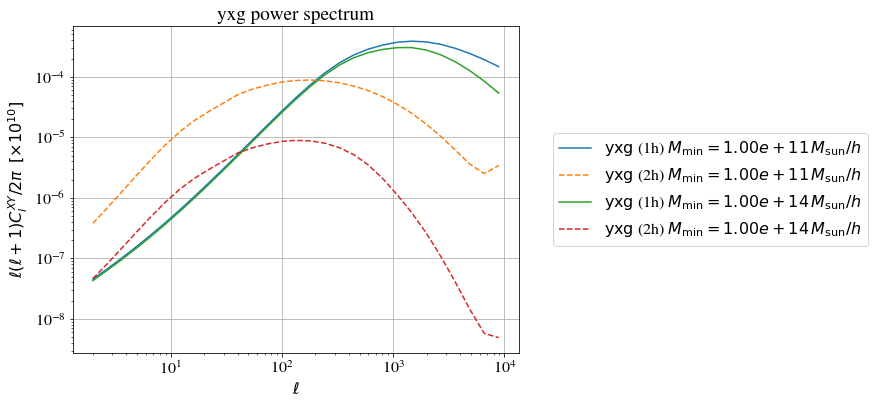

In [29]:

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"yxg power spectrum")
plt.grid()

p_arr  = np.geomspace(1e11,1e14,2)
h = 0.7
for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'tSZ_gal_1h,tSZ_gal_2h',
            'mass function' : 'T10',
            'pressure profile': 'A10', 
            'galaxy_sample': 'WIxSC3',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,   
            'M1SZ': p,
            'h': 0.7,
            'M_min_HOD' : 10.**11.32914985*h,
            'M1_prime_HOD' : 10.**12.51536196*h,
            'sigma_lnM_HOD' : 0.15
            })

    M.compute()
    cl_sz = M.cl_yg()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),label=r'$\mathrm{yxg}$ (1h) $M_\mathrm{min} = %.2e\,M_\mathrm{sun}/h$'%p)
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['2h']),ls='--',label=r'$\mathrm{yxg}$ (2h) $M_\mathrm{min} = %.2e\,M_\mathrm{sun}/h$'%p)
    
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

# Computing yxg for different gNFW pressure profiles

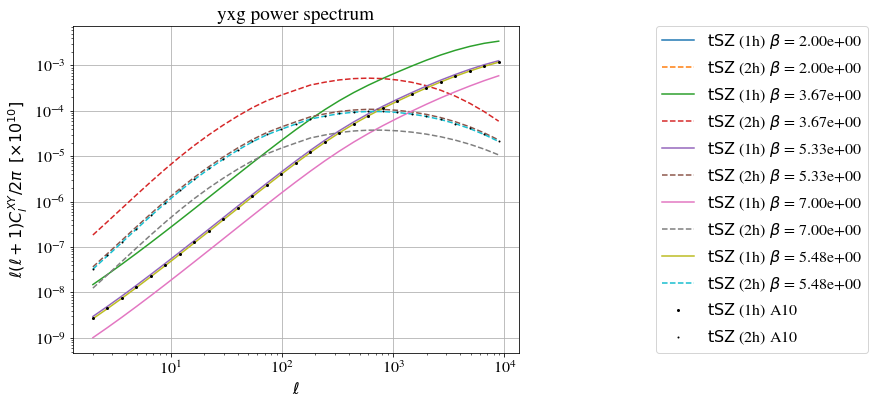

In [30]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
        'output':'tSZ_gal_1h,tSZ_gal_2h',
        'mass function' : 'T10',
        'pressure profile': 'A10', 
        'galaxy_sample': 'unwise',
        'galaxy_sample_id': 'green',
        'sz_verbose' : 10,
        'ell_max_mock' : 10000,
        'ell_min_mock' : 2
        })
        
M.compute()
cl_yg_a10 = M.cl_yg()
M.struct_cleanup()
M.empty()


plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"yxg power spectrum")
plt.grid()

p_arr  = np.linspace(2.,7., 4)
p_arr = np.append(p_arr,5.4807)
for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'tSZ_gal_1h,tSZ_gal_2h',
            'mass function' : 'T10',
            'pressure profile': 'Custom. GNFW', 
            'galaxy_sample': 'unwise',
            'galaxy_sample_id': 'green',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,       
            'betaGNFW': p
            })

    M.compute()
    cl_sz = M.cl_yg()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),label=r'$\mathrm{tSZ}$ (1h) $\beta$ = %.2e'%p)
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['2h']),ls='--',label=r'$\mathrm{tSZ}$ (2h) $\beta$ = %.2e'%p)
    
plt.loglog(cl_yg_a10['ell'],factor_sz*np.asarray(cl_yg_a10['1h']),c='k',ls='None',marker='o',markersize=2,label=r'$\mathrm{tSZ}$ (1h) A10')
plt.loglog(cl_yg_a10['ell'],factor_sz*np.asarray(cl_yg_a10['2h']),c='k',ls='None',marker='o',markersize=1,label=r'$\mathrm{tSZ}$ (2h) A10')
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

# Computing gxg for different mass ranges

In [ ]:

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"gxg power spectrum")
plt.grid()

p_arr  = np.geomspace(1e6,1e14,2)
h = 0.6766
for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'gal_gal_1h,gal_gal_2h',
            'mass function' : 'M500',
            'pressure profile': 'A10', 
            'galaxy_sample': 'WIxSC',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,  
            'M1SZ': p,
            'h': h,
            'M_min_HOD' : 10.**11.32914985*h,
            'M1_prime_HOD' : 10.**12.51536196*h,
            'sigma_lnM_HOD' : 0.15,
            })

    M.compute()
    cl_sz = M.cl_gg()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),label=r'$\mathrm{gxg}$ (1h) $M_\mathrm{min} = %.2e\,M_\mathrm{sun}/h$'%p)
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['2h']),ls='--',label=r'$\mathrm{gxg}$ (2h) $M_\mathrm{min} = %.2e\,M_\mathrm{sun}/h$'%p)
    
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

# Obtaining the mass function

In [35]:
M = Class()
M.set(common_settings)
M.set({
    'output': 'dndlnM',
     'mass function' : 'T10'
})
M.compute()


In [36]:
z = 0.
m = 1e11
M.get_dndlnM_at_z_and_M(z,m)

0.030328472285823627

In [37]:
M.struct_cleanup()
M.empty()

# Obtaining $\sigma(M,z)$

In [11]:
M = Class()
#M.set(common_settings)
M.set({
    'output': 'dndlnM',
})
M.compute()

In [12]:
z = 1.
m = 1e13
M.get_sigma_at_z_and_m(z,m)

0.9318739297658083

In [13]:
M.struct_cleanup()
M.empty()

# Obtaining vrms2

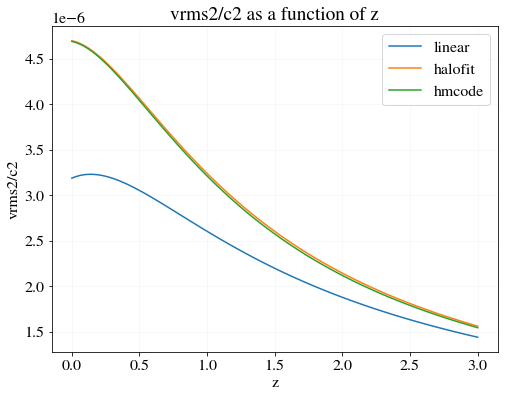

In [4]:
M = Class()
M.set(p18_cosmo)
M.set({
    'output': 'vrms2',
})
M.compute()


z = np.linspace(1.e-3,3.,100)
vrms2 = []
for zz in z:
  vrms2.append(M.get_vrms2_at_z(zz))
M.struct_cleanup()
M.empty()

M = Class()
M.set(p18_cosmo)
M.set({
    'output': 'vrms2',
    'non linear': 'halofit',
    'pk_nonlinear_for_vrms2': 1
})
M.compute()


z = np.linspace(1.e-3,3.,100)
vrms2_halofit = []
for zz in z:
  vrms2_halofit.append(M.get_vrms2_at_z(zz))
M.struct_cleanup()
M.empty()

M = Class()
M.set(p18_cosmo)
M.set({
    'output': 'vrms2',
    'non linear': 'hmcode',
    'pk_nonlinear_for_vrms2': 1
})
M.compute()


z = np.linspace(1.e-3,3.,100)
vrms2_hmcode = []
for zz in z:
  vrms2_hmcode.append(M.get_vrms2_at_z(zz))
M.struct_cleanup()
M.empty()

plt.plot(z,vrms2,label='linear')
plt.plot(z,vrms2_halofit,label='halofit')
plt.plot(z,vrms2_hmcode,label='hmcode')
plt.xscale('linear')
plt.yscale('linear')
plt.legend(loc=2)
plt.title(r'vrms2/c2 as a function of z')
plt.ylabel(r'vrms2/c2')
plt.xlabel(r'z')
plt.grid(which='both',alpha=0.3)
plt.legend(loc=1)

# Matter bispectrum effective approach

In [79]:
M = Class()
#params = gil_marin
params = planck_2015
# params['h'] = 0.7
M.set(params)
M.set({
    'output': 'bk_at_z_hf',
    'non linear': 'halofit',
    'ndim_redshifts':150,
    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    # set the k grid for compuation of sigma and dsigma used in HMF
    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.
})
M.compute()
print(M.sigma8())
print(M.get_sigma8_at_z(0))
print(M.Omega_Lambda())

reproducing Gil-Marin et al results

In [83]:
z = 0.
k1_a = np.geomspace(1e-6,10.,500)
h = params['h']
Qk1 = []
Qk1_smoothed = []
Qk1_SC = []
Qk1_TL = []
Qk1_TL_test = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = 2.*k1
  mu = np.cos(0.6*np.pi)
  k3 = np.sqrt(k1**2+k2**2+2*k1*k2*mu)
#   k3 = k1
#//Input: wavenumber in 1/Mpc
#//Output: total matter power spectrum P(k) in \f$ Mpc^3 \f$
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3
  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Qk1_TL_test.append(func_Q_TL_simo_pk(k1,k2,mu))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))


(0.6, 1.4)

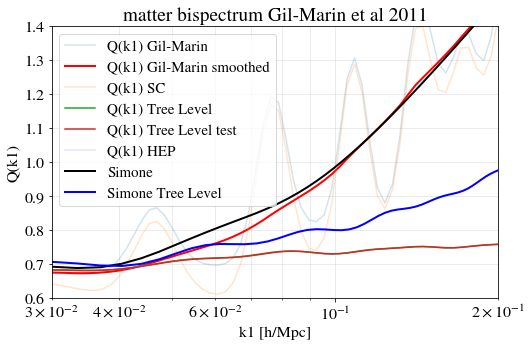

In [84]:
plt.figure(figsize=(8,5))
plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)
plt.plot(k1_a,np.asarray(Qk1_TL),label='Q(k1) Tree Level',alpha=1.)
plt.plot(k1_a,np.asarray(Qk1_TL_test),label='Q(k1) Tree Level test',alpha=1.)
plt.plot(k1_a,Q3n,label='Q(k1) HEP',alpha=0.2)
Simone = np.loadtxt("/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/Q_GMk.txt")
plt.plot(Simone[0,:],Simone[1,:],label='Simone',lw=2., c='k')
Simone = np.loadtxt("/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/Q_tree.txt")
plt.plot(Simone[0,:],Simone[1,:],label='Simone Tree Level',lw=2., c='b')
plt.yscale('linear')
plt.xscale('log')
plt.title(r'matter bispectrum Gil-Marin et al 2011')
plt.ylabel(r'Q(k1)')
plt.xlabel(r'k1 [h/Mpc]')
plt.grid(which='both',alpha=0.3)
plt.legend(loc=2,fontsize=15)
plt.xlim(0.03,0.2)
plt.ylim(0.6,1.4)

In [74]:
# mu = np.cos(0.6*np.pi)

# k1 = 0.3
# k2 = 0.1
# M.get_bispectrum_f2_kernel(k1,k2,k3)
def func_Q_TL(k1,k2,mu):
    k3 = np.sqrt(2*k1*k2*mu + k1**2 + k2**2)
    term1 = 2.*M.get_bispectrum_f2_kernel(k1,k2,k3)*M.pk_lin(k1*h,z)*h**3*M.pk_lin(k2*h,z)*h**3
    term2 = 2.*M.get_bispectrum_f2_kernel(k3,k1,k2)*M.pk_lin(k3*h,z)*h**3*M.pk_lin(k1*h,z)*h**3
    term3 = 2.*M.get_bispectrum_f2_kernel(k2,k3,k1)*M.pk_lin(k2*h,z)*h**3*M.pk_lin(k3*h,z)*h**3
    num = term1 + term2 + term3 
    term1 = M.pk_lin(k1*h,z)*h**3*M.pk_lin(k2*h,z)*h**3
    term2 = M.pk_lin(k3*h,z)*h**3*M.pk_lin(k1*h,z)*h**3
    term3 = M.pk_lin(k2*h,z)*h**3*M.pk_lin(k3*h,z)*h**3
    den = term1 + term2 + term3 
    return num/den

def func_Q_TL_simo_pk(k1,k2,mu):
    k3 = np.sqrt(2*k1*k2*mu + k1**2 + k2**2)
    term1 = 2.*M.get_bispectrum_f2_kernel(k1,k2,k3)*pk_simo(k1)*pk_simo(k2)
    term2 = 2.*M.get_bispectrum_f2_kernel(k3,k1,k2)*pk_simo(k3)*pk_simo(k1)
    term3 = 2.*M.get_bispectrum_f2_kernel(k2,k3,k1)*pk_simo(k2)*pk_simo(k3)
    num = term1 + term2 + term3 
    term1 = pk_simo(k1)*pk_simo(k2)
    term2 = pk_simo(k3)*pk_simo(k1)
    term3 = pk_simo(k2)*pk_simo(k3)
    den = term1 + term2 + term3 
    return num/den



(-3.0, 1.0)

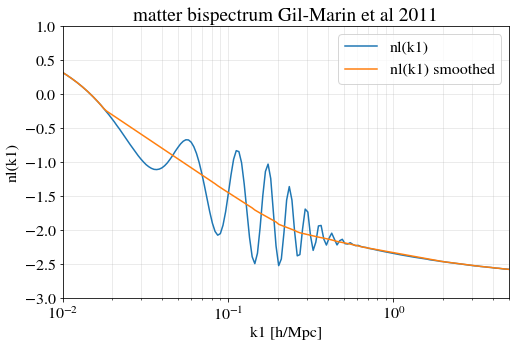

In [185]:
plt.figure(figsize=(8,5))
plt.plot(k1_a,nlk1,label='nl(k1)')
plt.plot(k1_a,nlk1_no_wiggles,label='nl(k1) smoothed')
plt.yscale('linear')
plt.xscale('log')
plt.title(r'matter bispectrum Gil-Marin et al 2011')
plt.ylabel(r'nl(k1)')
plt.xlabel(r'k1 [h/Mpc]')
plt.grid(which='both',alpha=0.3)
plt.legend(loc=1)
plt.xlim(0.01,5.)
plt.ylim(-3.,1.)

(0.1, 1000000000.0)

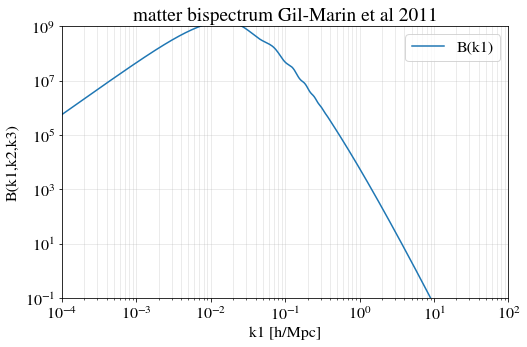

In [159]:
plt.figure(figsize=(8,5))
plt.plot(k1_a,Bk1_TL,label='B(k1)')
# plt.plot(k1_a,nlk1_no_wiggles,label='nl(k1) smoothed')
plt.yscale('log')
plt.xscale('log')
plt.title(r'matter bispectrum Gil-Marin et al 2011')
plt.ylabel(r'B(k1,k2,k3)')
plt.xlabel(r'k1 [h/Mpc]')
plt.grid(which='both',alpha=0.3)
plt.legend(loc=1)
plt.xlim(1e-4,1e2)
plt.ylim(1.e-1,1.e9)

(0.1, 1000000000.0)

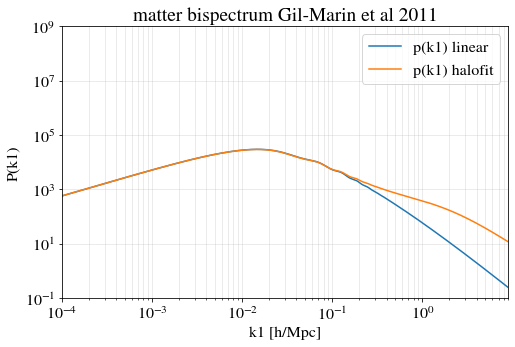

In [160]:
plt.figure(figsize=(8,5))
plt.plot(k1_a,pk_linear,label='p(k1) linear')
plt.plot(k1_a,pk_halofit,label='p(k1) halofit')
# plt.plot(k1_a,nlk1_no_wiggles,label='nl(k1) smoothed')
plt.yscale('log')
plt.xscale('log')
plt.title(r'matter bispectrum Gil-Marin et al 2011')
plt.ylabel(r'P(k1)')
plt.xlabel(r'k1 [h/Mpc]')
plt.grid(which='both',alpha=0.3)
plt.legend(loc=1)
plt.xlim(1e-4,9)
plt.ylim(1.e-1,1.e9)

# Obtaining $\nu(M,z)$
with $\nu = (\delta_\mathrm{crit}/\sigma)^2$ -- Note that in Tinker et al $\nu=\delta_\mathrm{crit}/\sigma$.

In [40]:
M = Class()
M.set(common_settings)
M.set({
    'output': 'dndlnM',
})
M.compute()

In [41]:
z = 1.
m = 1e13
M.get_nu_at_z_and_m(z,m)

3.2754435358511573

In [42]:
M.struct_cleanup()
M.empty()

# Obtaining linear bias $b$ and second order bias $b_2$


In [12]:
M = Class()
M.set(common_settings)
M.set({
    'output': 'dndlnM',
    'mass function' : 'T10'
})
M.compute()

In [13]:
z = 0.
nu = 2.
b1 = M.get_first_order_bias_at_z_and_nu(z,nu)
b2 = M.get_second_order_bias_at_z_and_nu(z,nu)
print('b1 = %.3f, b2 = %.3f'%(b1,b2))

b1 = 1.423, b2 = -0.577


In [18]:
nz = 10
nm = 100
z_arr = np.linspace(1e-5,3.,nz)
m_arr = np.geomspace(1e8,5e15,nm)
nu_arr = np.zeros((nz,nm))
b1_arr = np.zeros((nz,nm))
b2_arr = np.zeros((nz,nm))
for iz,z in enumerate(z_arr):
    for im,m in enumerate(m_arr):
        nu_arr[iz][im] = M.get_nu_at_z_and_m(z,m) 
        b1_arr[iz][im] = M.get_first_order_bias_at_z_and_nu(z,nu_arr[iz][im])
        b2_arr[iz][im] = M.get_second_order_bias_at_z_and_nu(z,nu_arr[iz][im])
        


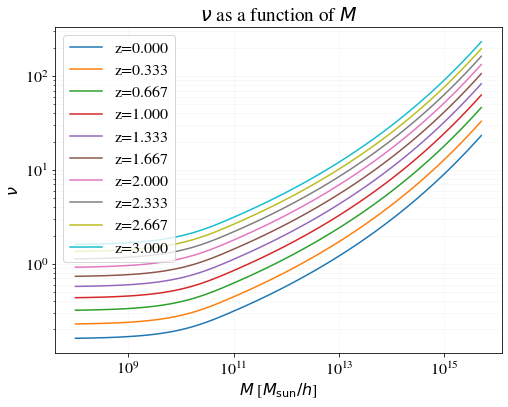

In [19]:
for iz,z in enumerate(z_arr):
    plt.plot(m_arr,nu_arr[iz],label='z=%.3f'%z)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.title(r'$\nu$ as a function of $M$')
plt.ylabel(r'$\nu$')
plt.xlabel(r'$M$ [$M_\mathrm{sun}/h$]')
plt.grid(which='both',alpha=0.1)


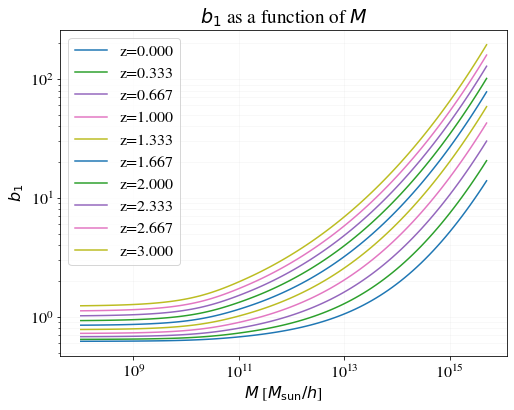

In [20]:
for iz,z in enumerate(z_arr):
    plt.plot(m_arr,b1_arr[iz],label='z=%.3f'%z)
    plt.plot(m_arr,-b1_arr[iz],ls='--')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.title(r'$b_1$ as a function of $M$')
plt.ylabel(r'$b_1$')
plt.xlabel(r'$M$ [$M_\mathrm{sun}/h$]')
plt.grid(which='both',alpha=0.1)

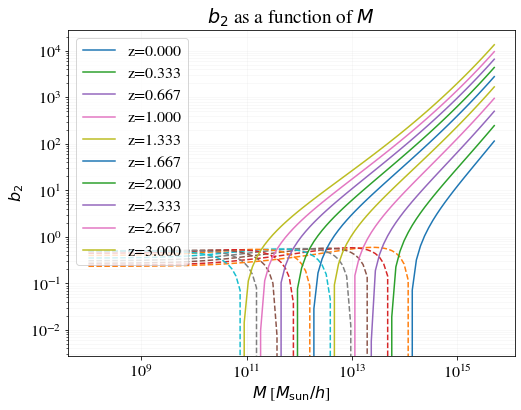

In [21]:
for iz,z in enumerate(z_arr):
    plt.plot(m_arr,b2_arr[iz],label='z=%.3f'%z)
    plt.plot(m_arr,-b2_arr[iz],ls='--')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.title(r'$b_2$ as a function of $M$')
plt.ylabel(r'$b_2$')
plt.xlabel(r'$M$ [$M_\mathrm{sun}/h$]')
plt.grid(which='both',alpha=0.1)

# Obtaining counter terms for halo model consistency


In [42]:
M = Class()
M.set(common_settings)
M.set({
    'output': 'dndlnM',
    'mass function' : 'T10',
    'hm_consistency': 1,
    'M1SZ': 1e9,
    'm_min_counter_terms' : 1e9,
})
M.compute()

In [43]:
m_min = M.M1SZ()
print('minimal mass : %.3e'%m_min)
# n_at_m_min = 

minimal mass : 1.000e+09


In [44]:

m = m_min
n_min_over_hmf_min  = []
b1_min_over_b1_of_min  = []
b2_min_over_b2_of_min  = []
z_arr = np.linspace(1.e-5,4,100)

for z in z_arr:
    n_min_over_hmf_min.append(M.get_hmf_counter_term_nmin_at_z(z)/M.get_dndlnM_at_z_and_M(z,m))
    numin = M.get_nu_at_z_and_m(z,m) 
    b1_of_min = M.get_first_order_bias_at_z_and_nu(z,numin)
    b2_of_min = M.get_second_order_bias_at_z_and_nu(z,numin)
    b1_min_over_b1_of_min.append(M.get_hmf_counter_term_b1min_at_z(z)/b1_of_min)
    b2_min_over_b2_of_min.append(M.get_hmf_counter_term_b2min_at_z(z)/b2_of_min)
n_min_over_hmf_min = np.asarray(n_min_over_hmf_min)
b1_min_over_b1_of_min = np.asarray(b1_min_over_b1_of_min)
b2_min_over_b2_of_min = np.asarray(b2_min_over_b2_of_min)

In [45]:
M.struct_cleanup()
M.empty()

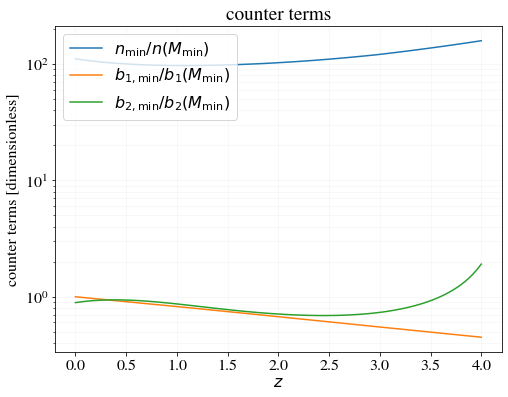

In [46]:
plt.plot(z_arr,n_min_over_hmf_min,label=r'$n_\mathrm{min}/n(M_\mathrm{min})$')
plt.plot(z_arr,b1_min_over_b1_of_min,label=r'$b_\mathrm{1,min}/b_1(M_\mathrm{min})$')
plt.plot(z_arr,b2_min_over_b2_of_min,label=r'$b_\mathrm{2,min}/b_2(M_\mathrm{min})$')
plt.xscale('linear')
plt.yscale('log')
plt.legend(loc=2)
plt.title('counter terms')
plt.ylabel(r'counter terms [dimensionless]')
plt.xlabel(r'$z$')
plt.grid(which='both',alpha=0.1)
plt.savefig('counter_terms_boris_Mmin_1e11.pdf')

# testing different HM consistency conditions

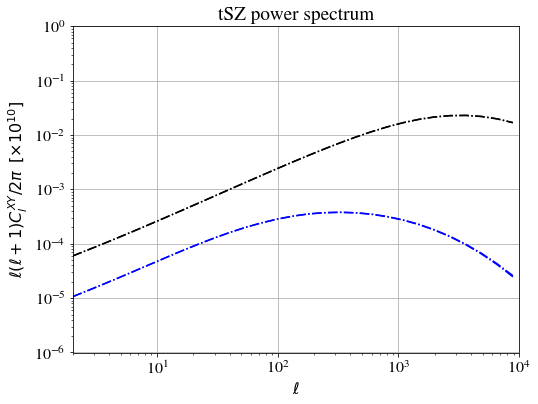

In [17]:
plt.xlim([2,10000])
plt.ylim([1.e-6,1])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"tSZ power spectrum")
plt.grid()

p_arr  = [0,1,2]
for p in p_arr:

    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
           'output':'tSZ_1h,tSZ_2h',
           #'pressure profile': 'A10', 
           #'sz_verbose' : 10,
           'mass function' : 'T10',
           'hm_consistency': p,
           'M1SZ': 1e11,
           'ell_max_mock' : 10000,
           'ell_min_mock' : 2
            })

    M.compute()
    cl_sz = M.cl_sz()
    M.struct_cleanup()
    M.empty()
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['1h']),'k-.',label=r'$\mathrm{tSZ}$ (1h)')
    plt.loglog(cl_sz['ell'],factor_sz*np.asarray(cl_sz['2h']),'b-.',label=r'$\mathrm{tSZ}$ (2h)')

[]

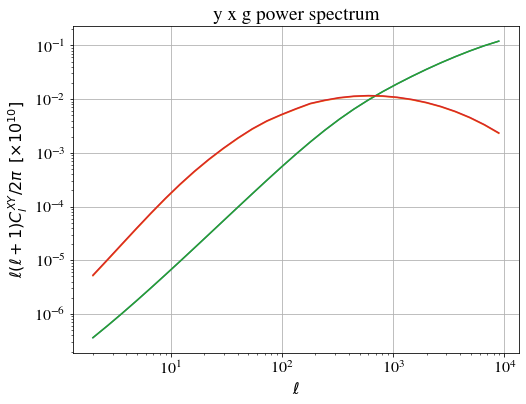

In [20]:
# plt.xlim([2,10000])
# plt.ylim([1.e-6,1])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"y x g power spectrum")
plt.grid()

p_arr  = [0,1,2]
for p in p_arr:
    M = Class()
    M.set(common_settings)
    M.set({# class_sz parameters:
            'output':'tSZ_gal_1h,tSZ_gal_2h',
            'mass function' : 'T10',
            'pressure profile': 'A10', 
            'galaxy_sample': 'unwise',
            'galaxy_sample_id': 'green',
            'sz_verbose' : 10,
            'ell_max_mock' : 10000,
            'ell_min_mock' : 2,
            'hm_consistency': p,
            'M1SZ': 1e11
            })

    M.compute()
    cl_yg = M.cl_yg()
    M.struct_cleanup()
    M.empty()
    plt.plot(cl_yg['ell'],cl_yg['1h'],label='yxg 1-halo')
    plt.plot(cl_yg['ell'],cl_yg['2h'],label='yxg 2-halo')

plt.loglog()


# connection between pressure profiles and y-m relations

In [71]:
M = Class()
cosmo_settings = {
                  'omega_cdm': 0.125,
                  'omega_b': 0.0224,
                  'A_s': 1.9e-9,
                  'n_s': 0.96,
                  'H0': 70.,
                  'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
                  'YHe': 'BBN',

                  # 1 massive neutrino (planck 2018 baseline)
                  'N_ur': 2.0328,
                  'N_ncdm': 1,
                  'm_ncdm': 0.06,
                  'T_ncdm': 0.71611,
                   
                  'M2SZ': 5e16,


                  # X ray mass bias (if applicable)
                  'B' : 1.,
                  'output' : 'sz_cluster_counts,m200c_to_m500c,m500c_to_m200c',
                  'pressure profile': 'Custom. GNFW',
                  'P0GNFW': 8.403,
                  'c500':1.177,
                  'gammaGNFW':0.3081,
                  'alphaGNFW':1.0510,
                  'betaGNFW':5.4905
}

M.set(cosmo_settings)
M.compute()

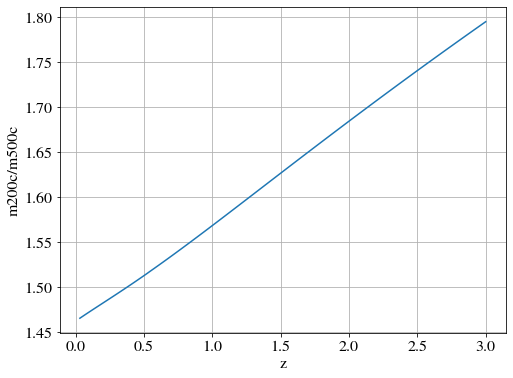

In [74]:

z=1.e-5
m500c_pivot = 3e14*0.7 # [Msun/h]


# corresponding m200c_pivot as a function of z:

z_array = np.linspace(0,3.,100)
m200c_over_m500c_pivot = []
m200m_over_m500c_pivot = []
for zz in z_array:
    m200c_over_m500c_pivot.append(M.get_m500c_to_m200c_at_z_and_M(zz,m500c_pivot)/m500c_pivot)
#     m200m_over_m500c_pivot.append(M.get_m500c_to_m200m_at_z_and_M(zz,m500c_pivot)/m500c_pivot)

    
plt.plot(z_array,m200c_over_m500c_pivot)
plt.xlabel('z')
plt.ylabel('m200c/m500c')
plt.grid(which='both')

[]

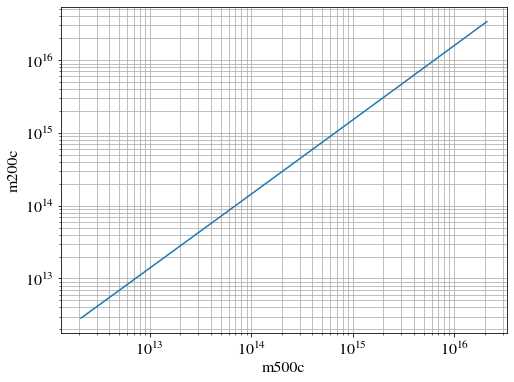

In [69]:
m500c_array = np.geomspace(1e-2,1e2,100)*m500c_pivot
m200c_array = []
for mm in m500c_array:
    m200c_array.append(M.get_m500c_to_m200c_at_z_and_M(z,mm))

plt.plot(m500c_array,m200c_array)
plt.xlabel('m500c')
plt.ylabel('m200c')
plt.grid(which='both')
plt.loglog()

In [70]:
# range of integration of the reduced pressure profile:
x= np.logspace(-8,2,1000)


def E(zp):
    return M.Hubble(zp)/M.Hubble(0.)

vec_get_dy_classy_gnfw = np.vectorize(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c)
vec_get_dy_classy_battaglia = np.vectorize(M.get_1e6xdy_from_battaglia_pressure_at_x_z_and_m200c)

def y0_over_Ez2_over_mfid_gnfw_at_m_and_z(m_over_m_pivot_500c,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    pp_gnfw = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(xx,z,m))
    pp_gnfw = vec_get_dy_classy_gnfw(x,z,m500c)
    norm_gnfw = 2.*np.trapz(pp_gnfw, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_gnfw


def y0_over_Ez2_over_mfid_battaglia_at_m_and_z(m_over_m_pivot_500c,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    m200c = M.get_m500c_to_m200c_at_z_and_M(zz,m500c)
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(xx,z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(x,z,m200c)
    norm_battaglia = 2.*np.trapz(pp_battaglia, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_battaglia

def y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta(m_over_m_pivot_500c,thetap,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    theta_over_theta_500c = thetap
    pp_gnfw = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_gnfw = vec_get_dy_classy_gnfw(np.sqrt(x**2+theta_over_theta_500c**2),z,m500c)
    norm_gnfw = 2.*np.trapz(pp_gnfw, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_gnfw

def y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(m_over_m_pivot_500c,thetap,z):
    m500c = m_over_m_pivot_500c*m500c_pivot
    m200c = M.get_m500c_to_m200c_at_z_and_M(zz,m500c)
    theta_over_theta_500c = thetap
    theta_over_theta_200c = theta_over_theta_500c*(m200c/m500c)**(1./3.)
    
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(np.sqrt(x**2+theta_over_theta_200c**2),z,m200c)
    norm_battaglia = 2.*np.trapz(pp_battaglia, x=x)/E(z)**2*1e-6/m_over_m_pivot_500c
    return norm_battaglia

vec_y0_gnfw = np.vectorize(y0_over_Ez2_over_mfid_gnfw_at_m_and_z)
vec_y_gnfw = np.vectorize(y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta)

def tau_gnfw_of_theta_over_theta_500c_at_z(thetap,z):
    return y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta(1.,thetap,z)/y0_over_Ez2_over_mfid_gnfw_at_m_and_z(1.,z)
    
vec_tau_gnfw = np.vectorize(tau_gnfw_of_theta_over_theta_500c_at_z)



vec_y0_battaglia = np.vectorize(y0_over_Ez2_over_mfid_battaglia_at_m_and_z)
vec_y_battaglia = np.vectorize(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta)

def tau_battaglia_of_theta_over_theta_500c_at_z(thetap,z):
    return y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(1.,thetap,z)/y0_over_Ez2_over_mfid_battaglia_at_m_and_z(1.,z)
    
vec_tau_battaglia = np.vectorize(tau_battaglia_of_theta_over_theta_500c_at_z)



# m = m_pivot
#y0_over_Ez2_gnfw_at_m_and_z(1.,z)

In [71]:
t = 0.
print('10^A_0 (gnfw) =',vec_y0_gnfw(1.,z))
print('10^A_0 (gnfw) = ',vec_y_gnfw(1.,0.,z))
print('10^A_0 (battaglia) =',vec_y0_battaglia(1.,z))
print('10^A_0 (battaglia) = ',vec_y_battaglia(1.,0.,z))

10^A_0 (gnfw) = 4.950179581389252e-05
10^A_0 (gnfw) =  4.950179581389252e-05
10^A_0 (battaglia) = 4.902769636746939e-05
10^A_0 (battaglia) =  4.902769636746939e-05


In [72]:
n_m = 100
n_th = 80
m_array = np.geomspace(1e-2,1e2,n_m)
th_array = np.geomspace(0.1,3.,n_th)

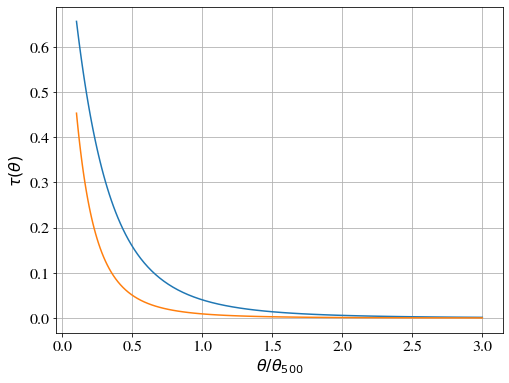

In [73]:
plt.plot(th_array,vec_tau_gnfw(th_array,z),label='gnfw')
plt.plot(th_array,vec_tau_battaglia(th_array,z),label='battaglia')
plt.xlabel(r'$\theta/\theta_{500}$')
plt.ylabel(r'$\tau(\theta)$')
plt.grid(which='both')
plt.legend(loc=1)

In [74]:
xd, yd = np.log(m_array), np.log(1.+th_array)
X, Y = np.meshgrid(xd, yd)
Z_gnfw = np.zeros(X.shape)
Z_battaglia = np.zeros(X.shape)
for ith in range(n_th):
    for im in range(n_m):
        mm = m_array[im]
        thth = th_array[ith]
        Z_gnfw[ith][im] = np.log(y_over_Ez2_over_mfid_gnfw_at_m_and_z_theta(mm,thth,z))
        Z_battaglia[ith][im] = np.log(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(mm,thth,z))


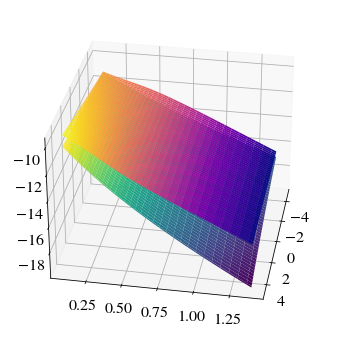

In [81]:
# Plot the 3D figure of the fitted function and the residuals.
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z_gnfw, cmap='plasma')
ax.plot_surface(X, Y, Z_battaglia, cmap='viridis')
#ax.set_zlim(np.min(Z),np.max(Z))

ax.view_init(30, 10)
plt.show()

In [84]:
from scipy.optimize import curve_fit

ln_tentoA0_gnfw = np.log(vec_y_gnfw(1.,0.,z))
def ym_rel_gnfw(vars_, a, b):
    xv,yv = vars_
    return a*xv + ln_tentoA0_gnfw + np.log(vec_tau_gnfw(np.exp(b*xv)*(np.exp(yv)-1.),z))

ln_tentoA0_battaglia = np.log(vec_y_battaglia(1.,0.,z))
def ym_rel_battaglia(vars_, a, b):
    xv,yv = vars_
    return a*xv + ln_tentoA0_battaglia + np.log(vec_tau_battaglia(np.exp(b*xv)*(np.exp(yv)-1.),z))





xdata = np.vstack((X.ravel(), Y.ravel()))
popt_gnfw, pcov_gnfw = curve_fit(ym_rel_gnfw, xdata, Z_gnfw.ravel(),p0 = [0.08,-0.025])
popt_battaglia, pcov_battaglia = curve_fit(ym_rel_battaglia, xdata, Z_battaglia.ravel(),p0 = [0.08,-0.025])

In [85]:
print(r'gnfw: 10^A_{0} = %.4e B=%.4e C=%.4e'%(np.exp(ln_tentoA0_gnfw),popt_gnfw[0],popt_gnfw[1]))
print(r'battaglia: 10^A_{0} = %.4e B=%.4e C=%.4e'%(np.exp(ln_tentoA0_battaglia),popt_battaglia[0],popt_battaglia[1]))


gnfw: 10^A_{0} = 4.9502e-05 B=1.9431e-01 C=6.4731e-02
battaglia: 10^A_{0} = 4.9028e-05 B=2.1964e-01 C=1.3577e-01


In [89]:
B_gnfw_bf = 1.9431e-01
C_gnfw_bf = 6.4731e-02

B_battaglia_bf = 2.1964e-01
C_battaglia_bf = 1.3577e-01

B_act = 0.08
C_act = -0.025

In [90]:
Z_fit_gnfw = np.zeros(X.shape)
Z_fit_battaglia = np.zeros(X.shape)
Z_fit_act = np.zeros(X.shape)
for ith in range(n_th):
    for im in range(n_m):
        mm = m_array[im]
        lnm = np.log(mm)
        thth = th_array[ith]
        ln_1pthth = np.log(1.+thth)
        Z_fit_gnfw[ith][im] = ym_rel_gnfw((lnm,ln_1pthth),B_gnfw_bf,C_gnfw_bf)
        Z_fit_battaglia[ith][im] = ym_rel_battaglia((lnm,ln_1pthth),B_battaglia_bf,C_battaglia_bf)
        Z_fit_act[ith][im] = ym_rel_gnfw((lnm,ln_1pthth),B_act,C_act)



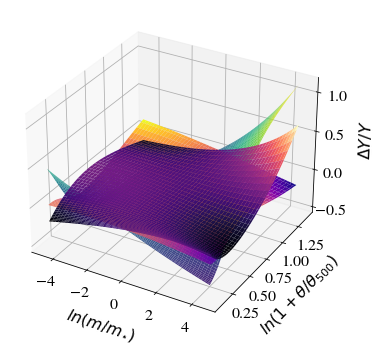

In [93]:
# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, (np.exp(Z_fit_gnfw)-np.exp(Z_gnfw))/np.exp(Z_gnfw), cmap='plasma')
ax.plot_surface(X, Y, (np.exp(Z_fit_battaglia)-np.exp(Z_battaglia))/np.exp(Z_battaglia), cmap='magma')
ax.plot_surface(X, Y, (np.exp(Z_fit_act)-np.exp(Z_gnfw))/np.exp(Z_gnfw), cmap='viridis')
plt.xlabel(r'$ln(m/m_{\star})$',labelpad=10)
plt.ylabel(r'$ln(1+\theta/\theta_{500})$',labelpad=10)
ax.set_zlabel(r'$\Delta Y/Y$',labelpad=10)
#ax.set_zlim(np.min(np.log(Z)),np.max(np.log(Z)))
plt.show()
#ax.legend()

Text(0.5, 1.0, 'class_sz gnfw')

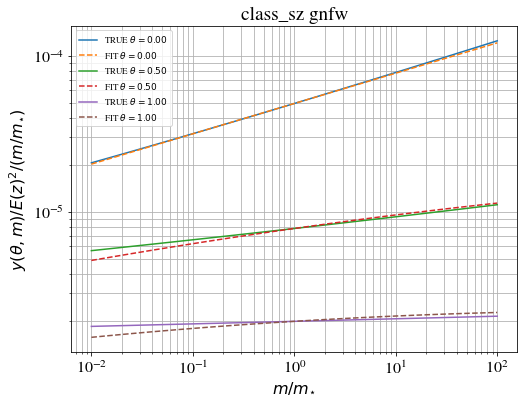

In [97]:
theta_test = 0.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_gnfw_bf, C_gnfw_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')

theta_test = 0.5
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_gnfw_bf, C_gnfw_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')


theta_test = 1.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_gnfw_bf, C_gnfw_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')




plt.loglog()
plt.grid(which='both')
plt.xlabel(r'$m/m_{\star}$')
plt.ylabel(r'$y(\theta,m)/E(z)^2/(m/m_{\star})$')
plt.legend(fontsize = 9.)
plt.title('class_sz gnfw')

Text(0.5, 1.0, 'class_sz battaglia')

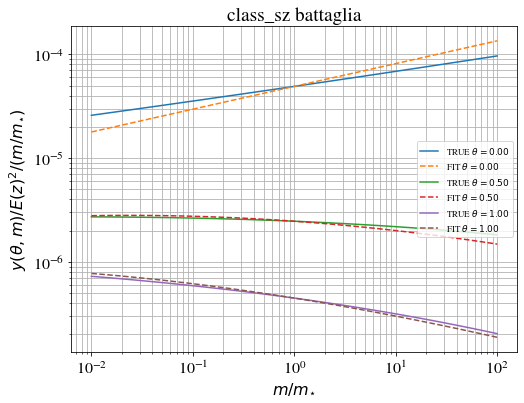

In [98]:
theta_test = 0.
plt.plot(m_array,vec_y_battaglia(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_battaglia((np.log(m_array),np.log(1.+theta_test)), B_battaglia_bf, C_battaglia_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')

theta_test = 0.5
plt.plot(m_array,vec_y_battaglia(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_battaglia((np.log(m_array),np.log(1.+theta_test)), B_battaglia_bf, C_battaglia_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')


theta_test = 1.
plt.plot(m_array,vec_y_battaglia(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_battaglia((np.log(m_array),np.log(1.+theta_test)), B_battaglia_bf, C_battaglia_bf)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')




plt.loglog()
plt.grid(which='both')
plt.xlabel(r'$m/m_{\star}$')
plt.ylabel(r'$y(\theta,m)/E(z)^2/(m/m_{\star})$')
plt.legend(fontsize = 9.)
plt.title('class_sz battaglia')

Text(0.5, 1.0, 'act gnfw')

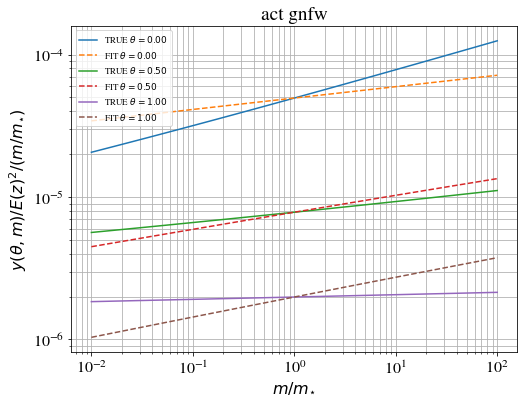

In [99]:
theta_test = 0.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_act, C_act)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')

theta_test = 0.5
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_act, C_act)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')


theta_test = 1.
plt.plot(m_array,vec_y_gnfw(m_array,theta_test,z),label=r'TRUE $\theta=%.2f$'%(theta_test),ls='-')
plt.plot(m_array,np.exp(ym_rel_gnfw((np.log(m_array),np.log(1.+theta_test)), B_act, C_act)),label=r'FIT $\theta=%.2f$'%(theta_test),ls='--')




plt.loglog()
plt.grid(which='both')
plt.xlabel(r'$m/m_{\star}$')
plt.ylabel(r'$y(\theta,m)/E(z)^2/(m/m_{\star})$')
plt.legend(fontsize = 9.)
plt.title('act gnfw')

In [17]:
M.struct_cleanup()
M.empty()

# y-m relation

In [10]:
M = Class()
cosmo_settings = {
                  'omega_cdm': 0.125,
                  'omega_b': 0.0224,
                  'A_s': 1.9e-9,
                  'n_s': 0.96,
                  'H0': 69.,
                  'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
                  'YHe': 'BBN',

                  # 1 massive neutrino (planck 2018 baseline)
                  'N_ur': 2.0328,
                  'N_ncdm': 1,
                  'm_ncdm': 0.06,
                  'T_ncdm': 0.71611,


                  # X ray mass bias (if applicable)
                  'B' : 1.,
    
                  'output' : 'sz_cluster_counts'
}

M.set(cosmo_settings)
M.set({
          'y_m_relation' : 1, # simons observatory/ACT
          # scaling law parameter
          # Hilton et al 2020
          'A_ym' : 4.95e-5,
          'B_ym' : 0.08,
})
M.compute()

z = 1.e0
m = np.geomspace(5e13,5e15,50)
y_hilton = []
for mm in m:
    y_hilton.append(M.get_y_at_m_and_z(mm,z))
    
M.set({
    'y_m_relation' : 0, # planck 
     # scaling law parameter
     # Planck 2015    ?
    'ystar_ym': -0.186,
    'alpha_ym': 1.78,
    'beta_ym': 0.66,
    
})
M.compute()
y_planck = []
for mm in m:
    y_planck.append(M.get_y_at_m_and_z(mm,z))
#y_hilton

[]

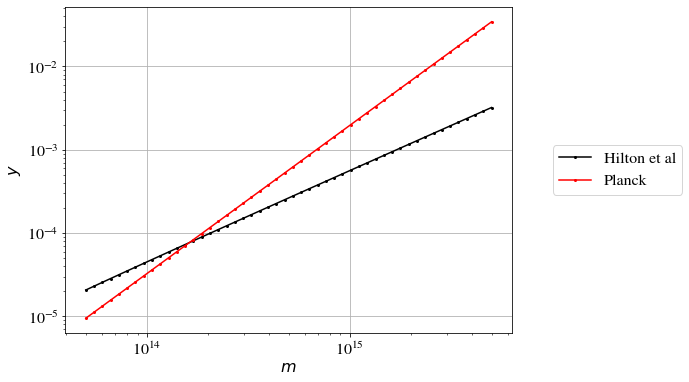

In [11]:
plt.xlabel(r"$m$")
plt.ylabel(r"$y$")
plt.grid()
plt.plot(m,y_hilton,marker  = 'o',markersize = 2.,c='k',label='Hilton et al')
plt.plot(m,y_planck,marker  = 'o',markersize = 2.,c='r',label='Planck')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.loglog()

In [12]:
M.struct_cleanup()
M.empty()

# Computing cluster abundance

In [98]:
M = Class()
cluster_settings = {
                   # LambdaCDM parameters
#                    'h':0.7,
#                    'B': 1.,
#                    'Omega_b':0.04,
#                    'Omega_cdm':0.26,
#                    'A_s':1.75e-9,
#                    'n_s': 0.96
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   'n_s': 0.96605
}

best_fit ={
   'H0': 6.7169970E+01,
   'A_s': 1.8160055E-09,
   'omega_cdm': 1.1972036E-01,
   'B_ym': -8.7525562E-02,
   'A_ym': 4.9660989E-05,
   'omega_b': 0.022383,
   'tau_reio': 0.0543,
   'n_s': 0.96605
}

mass_cal ={
#    'H0': 6.7169970E+01,
#    'A_s': 1.8160055E-09,
#    'omega_cdm': 1.1972036E-01,
   'B_ym': 0.1,
   'A_ym': 2.85e-5,
#    'omega_b': 0.022383,
#    'tau_reio': 0.0543,
#    'n_s': 0.96605
}

M.set(p18_cosmo)
M.set(mass_cal)
# M.set(best_fit)
M.set({
          'non linear': 'halofit',
          'output' : 'sz_cluster_counts',
          'mass function' : 'M500',
          'integrate_wrt_m500c' : 1,
          'has_selection_function' : 1,
          'experiment' : 1, # simons observatory
          'y_m_relation' : 1,
          'signal-to-noise cut-off for survey cluster completeness' : 5.,

          # scaling law parameter
          #'A_ym' : 4.90e-5,
          #'B_ym' : 0.22,
          'C_ym' : 0.,



          'M1SZ' : 5e13,
          'M2SZ' : 5e15,

          # bin_z_min_cluster_counts : 0.
          # bin_z_max_cluster_counts : 2.
          # bin_dz_cluster_counts : 0.1
          #
          #
          #'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
          'YHe': 'BBN',

          # 1 massive neutrino (planck 2018 baseline)
          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.06,
          'T_ncdm': 0.71611,

          #
          # #3 massive neutrinos
          # N_ur : 0.00641
          # N_ncdm : 1
          # deg_ncdm : 3
          # m_ncdm : 0.02
          # T_ncdm : 0.71611



          #
          # HMF_prescription_NCDM: 'CDM'

          # verbose parameters for debugging
          'input_verbose' : 0,
          'background_verbose': 3,
          'perturbations_verbose': 0,
          'sz_verbose'  : 3,

          # X ray mass bias (if applicable)
          'B' : 1.,


          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 2.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.1,

          'dlny' : 0.03,
          'lnymin' : -11.,
          'lnymax' : -5.,
          'sigmaM_ym' : 0.2,
          'dlnM_cluster_count_completeness_grid' : 0.02,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,

          'dz_cluster_count_completeness_grid_low_z' : 5e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-1,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,

          'mass_epsrel_cluster_counts' : 1e-3,
          'mass_epsabs_cluster_counts' : 1e-30,

          'redshift_epsrel_cluster_counts' : 1e-3,
          'redshift_epsabs_cluster_counts' : 1e-30,
          #
          #
          # # tabulation of mass function:
          'n_z_dndlnM' : 80,
          'n_m_dndlnM' : 80,
          #
          # # computation of mass function
          # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 80,
          'ndim_redshifts' : 80,
          #
          # pk setup for computation of sigma and dsigma
          'k_per_decade_class_sz' : 20.,
          'k_min_for_pk_class_sz' : 1e-3,
          'k_max_for_pk_class_sz' : 1e1,

          'P_k_max_h/Mpc' : 1e1
    
})
M.compute()

In [99]:
mm = 5e13
z = 1.5
M.get_y_at_m_and_z(mm,z)


2.0041191911693348e-05

In [100]:
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())

sigma8 : 0.811665
Omega_m : 0.315838


In [101]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']
M.struct_cleanup()
M.empty()

In [102]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))



In [103]:
# here puth the path to the directory : MFMF_SOSim_3freq_tiles
path_to_catalogue = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/MFMF_SOSim_3freq_tiles/'
from astropy.io import fits
#"fits_image_filename = fits.util.get_testdata_filepath(path_to_catalogue+'MFMF_SOSim_3freq_tiles_M500.fits')
tcat = path_to_catalogue+'MFMF_SOSim_3freq_tiles_M500.fits'
list = fits.open(tcat)
data = list[1].data
z = data.field("redshift")
snr = data.field("SNR")
tile = data.field("tileName")
snrcut = 5
z = z[snr > snrcut]
snr = snr[snr > snrcut]
sf = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_020621_skyfracs.txt')
print('sky fraction:',sf.sum())

sky fraction: 0.43213469173544644


In [104]:
m500cs = data.field("redshift")

In [105]:
data.columns

ColDefs(
    name = 'name'; format = '18A'
    name = 'RADeg'; format = 'D'
    name = 'decDeg'; format = 'D'
    name = 'SNR'; format = 'D'
    name = 'numSigPix'; format = 'D'
    name = 'template'; format = '17A'
    name = 'tileName'; format = '7A'
    name = 'galacticLatDeg'; format = 'D'
    name = 'fixed_SNR'; format = 'D'
    name = 'deltaT_c'; format = 'D'
    name = 'err_deltaT_c'; format = 'D'
    name = 'y_c'; format = 'D'
    name = 'err_y_c'; format = 'D'
    name = 'fixed_deltaT_c'; format = 'D'
    name = 'fixed_err_deltaT_c'; format = 'D'
    name = 'fixed_y_c'; format = 'D'
    name = 'fixed_err_y_c'; format = 'D'
    name = 'redshift'; format = 'D'
    name = 'redshiftErr'; format = 'D'
    name = 'M500'; format = 'D'
    name = 'M500_errPlus'; format = 'D'
    name = 'M500_errMinus'; format = 'D'
    name = 'M500Uncorr'; format = 'D'
    name = 'M500Uncorr_errPlus'; format = 'D'
    name = 'M500Uncorr_errMinus'; format = 'D'
    name = 'M200m'; format = 'D'
    name

Text(0, 0.5, '$\\log_{10}(SNR)$')

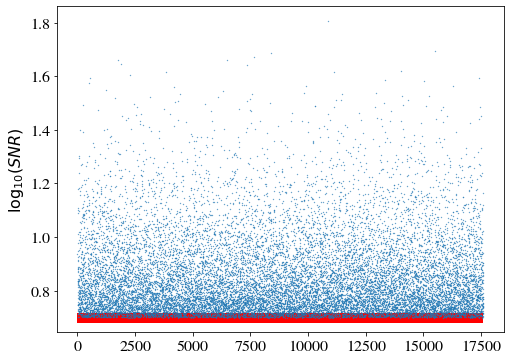

In [106]:
plt.plot(np.log10(snr),marker='o',ls='None',markersize=0.3)
plt.hlines(np.log10(snrcut),xmin=0,xmax=len(snr),color='r',lw=10)
plt.ylabel(r'$\log_{10}(SNR)$')

Text(0, 0.5, '$z$')

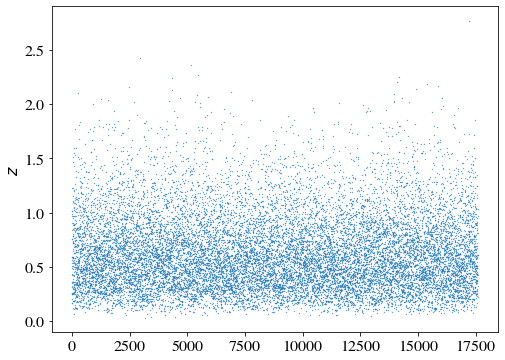

In [107]:
plt.plot(z,marker='o',ls='None',markersize=0.3)
plt.ylabel(r'$z$')
# plt.hlines(np.log10(snrcut),xmin=0,xmax=len(snr),color='r',lw=10)

(1.0, 5000.0)

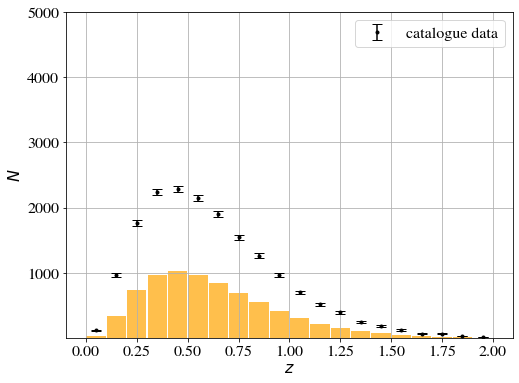

In [108]:
N_clusters_z, xedges = np.histogram(z, bins=z_edges)
plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.hist(z_center,N_clusters_z_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95)
plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
plt.ylim(1e0,5e3)

In [109]:
N_clusters_y

array([8756, 4234, 2242, 1209,  608,  308,  126,  112])

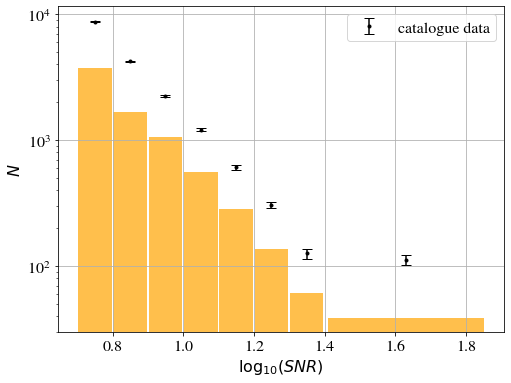

In [110]:
N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.plot(log10y_center,N_clusters_y_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95)


plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')

In [96]:
dNdzdy_catalog, zedges, yedges = np.histogram2d(z,np.log10(snr), bins=[z_edges,log10y_edges])
SZCC_Cash = 0.
for index_z in range(N_z):
    for index_y in range(N_y):
        if not dNdzdy_theoretical[index_z][index_y] == 0.:
            ln_factorial = 0.
            if not dNdzdy_catalog[index_z,index_y] == 0.:
                if dNdzdy_catalog[index_z,index_y] > 10.:
                    # Stirling approximation only for more than 10 elements
                    ln_factorial = 0.918939 + (dNdzdy_catalog[index_z,index_y] + 0.5) * np.log(dNdzdy_catalog[index_z,index_y]) - dNdzdy_catalog[index_z,index_y]
                else:
                    # Direct computation of factorial
                    ln_factorial = np.log(np.math.factorial(int(dNdzdy_catalog[index_z,index_y])))
            SZCC_Cash += (dNdzdy_catalog[index_z,index_y] * np.log(dNdzdy_theoretical[index_z][index_y]) - dNdzdy_theoretical[index_z][index_y] - ln_factorial)

# return ln(L)
loglkl = SZCC_Cash
print(loglkl)

-6176.343791955804


In [97]:
np.sum(dNdzdy_theoretical)

29743.774401555485

In [17]:
np.sum(dNdzdy_theoretical)

15321.896891488475